# Example script: load LE data and plot GSAT

This is a basic script that loads output from a large ensemble, does some simple processing, and plots the result.

Make sure that preprocessing with bash/cdo script has been run.


**Please use the *Pangeo (2019.09.12 - py3.7)* environment.** The standard Python 3 environment does not provide all necessary packages. Of course you can also use your own custom environment.

## Setup
### load required packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import numpy as np
# from scipy.io import netcdf
# import scipy.stats as stats
import pandas as pd

import xarray as xr
# import random
import os
from pprint import pprint
from tqdm import tqdm

# # Import Cdo-py (only works with custom environment)
# import cdo
# cdo = cdo.Cdo() #


    


## set paths

In [2]:
# directories with SMILE output
basedir_MMLEA = '/glade/collections/cdg/data/CLIVAR_LE/'
basedir_cmip6_ensembles = '/glade/scratch/rwills/cmip6_ensembles/'

# directories with processed output
basedir_processed_MMLEA = '/glade/scratch/milinski/SMILEs/'

# directory for saving plots
plotdir = './plots/test/'
if not os.path.exists(plotdir):
    os.makedirs(plotdir)
    



## List available data

In [3]:
# list contents of MMLEA archive
[f for f in os.listdir(basedir_MMLEA) if not f.startswith(('.'))]

['csiro_mk36_lens',
 'olens_mckinnon',
 'cesm_lens',
 'CVDP-LE',
 'gfdl_cm3_lens',
 'ec_earth_lens',
 'canesm2_lens',
 'gfdl_esm2m_lens',
 'mpi_lens',
 'olens_mckinnon_update_08142019']

In [4]:
# list contents of processed SMILEs
[f for f in os.listdir(basedir_processed_MMLEA) if not f.startswith(('.'))]

['MPI-GE', 'CESM-LENS', 'CanESM2']

In [5]:
# list available CMIP SMILEs

# ignores hidden files and folder with temporary data
[f for f in os.listdir(basedir_cmip6_ensembles) if not f.startswith(('.','model_variants','native_grid','unsorted'))]


['ec-earth3_lens',
 'ukesm1_lens',
 'giss_e21h_lens',
 'cnrm_cm6_lens',
 'miroc6_lens',
 'norcpm1_lens',
 'cesm2_lens',
 'canesm5_lens',
 'access_lens',
 'giss_e21g_lens',
 'miroc_esm2l_lens',
 'ipsl_cm6a_lens']

In [6]:
# explore MPI-GE data in more detail
filelist = os.listdir(basedir_processed_MMLEA+'MPI-GE/global_mean/')
filelist.sort()
pprint(filelist)

['tas_mpi-ge_r100i1p1_globalmean.nc',
 'tas_mpi-ge_r10i1p1_globalmean.nc',
 'tas_mpi-ge_r11i1p1_globalmean.nc',
 'tas_mpi-ge_r12i1p1_globalmean.nc',
 'tas_mpi-ge_r13i1p1_globalmean.nc',
 'tas_mpi-ge_r14i1p1_globalmean.nc',
 'tas_mpi-ge_r15i1p1_globalmean.nc',
 'tas_mpi-ge_r16i1p1_globalmean.nc',
 'tas_mpi-ge_r17i1p1_globalmean.nc',
 'tas_mpi-ge_r18i1p1_globalmean.nc',
 'tas_mpi-ge_r19i1p1_globalmean.nc',
 'tas_mpi-ge_r1i1p1_globalmean.nc',
 'tas_mpi-ge_r20i1p1_globalmean.nc',
 'tas_mpi-ge_r21i1p1_globalmean.nc',
 'tas_mpi-ge_r22i1p1_globalmean.nc',
 'tas_mpi-ge_r23i1p1_globalmean.nc',
 'tas_mpi-ge_r24i1p1_globalmean.nc',
 'tas_mpi-ge_r25i1p1_globalmean.nc',
 'tas_mpi-ge_r26i1p1_globalmean.nc',
 'tas_mpi-ge_r27i1p1_globalmean.nc',
 'tas_mpi-ge_r28i1p1_globalmean.nc',
 'tas_mpi-ge_r29i1p1_globalmean.nc',
 'tas_mpi-ge_r2i1p1_globalmean.nc',
 'tas_mpi-ge_r30i1p1_globalmean.nc',
 'tas_mpi-ge_r31i1p1_globalmean.nc',
 'tas_mpi-ge_r32i1p1_globalmean.nc',
 'tas_mpi-ge_r33i1p1_globalmean.nc',
 '

## load MPI-GE

In [7]:
var = 'tas'
model = 'mpi-ge'
filepath = basedir_processed_MMLEA + 'MPI-GE/global_mean/'

file_prefix=var+'_'+model+'_'
file_suffix='_globalmean.nc'

# initialise array:
ds = []

for member in tqdm(range(1,101)):
    id = 'r'+str(member)+'i1p1'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file_prefix+id+file_suffix).squeeze()
    ds.append(member)


mpi_ge_GSAT = xr.concat(ds, dim='ensemble')
mpi_ge_GSAT['tas'] = mpi_ge_GSAT['tas']-273.15 # K to °C

100%|██████████| 100/100 [00:01<00:00, 80.89it/s]


In [8]:
mpi_ge_GSAT

<xarray.Dataset>
Dimensions:    (bnds: 2, ensemble: 100, time: 3000)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2099-12-16T12:00:00
    lon        float64 0.0
    lat        float64 0.0
    height     float64 2.0
Dimensions without coordinates: bnds, ensemble
Data variables:
    time_bnds  (ensemble, time, bnds) datetime64[ns] 1850-01-01 ... 2100-01-01
    tas        (ensemble, time) float32 11.948334 12.006012 ... 16.201263
Attributes:
    CDI:                    Climate Data Interface version 1.9.9 (https://mpi...
    Conventions:            CF-1.4
    source:                 MPI-ESM 1.1.00p2
    institution:            Max-Planck-Institut fuer Meteorologie
    history:                Fri Aug 06 19:57:42 2021: cdo fldmean /glade/coll...
    institute_id:           MPI-M
    experiment_id:          historical
    model_id:               MPI-ESM
    forcing:                N/A
    parent_experiment_id:   piControl
    parent_experiment_rip:  r1i1p1
    br

### plot GSAT

In [11]:
# compute annual mean
mpi_ge_GSAT_ym = mpi_ge_GSAT.groupby('time.year').mean('time')

# compute anomalies relative to 1850-1900
offset = mpi_ge_GSAT['tas'].loc[:,'1850-01-01':'1900-12-31'].mean(dim='time').mean(dim='ensemble')
mpi_ge_GSAT_ym_anom = mpi_ge_GSAT_ym - offset

In [12]:
mpi_ge_GSAT_ym_anom

<xarray.Dataset>
Dimensions:  (ensemble: 100, year: 250)
Coordinates:
    lon      float64 0.0
    lat      float64 0.0
    height   float64 2.0
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2095 2096 2097 2098 2099
Dimensions without coordinates: ensemble
Data variables:
    tas      (year, ensemble) float32 0.15856838 -0.0310812 ... 4.0157986

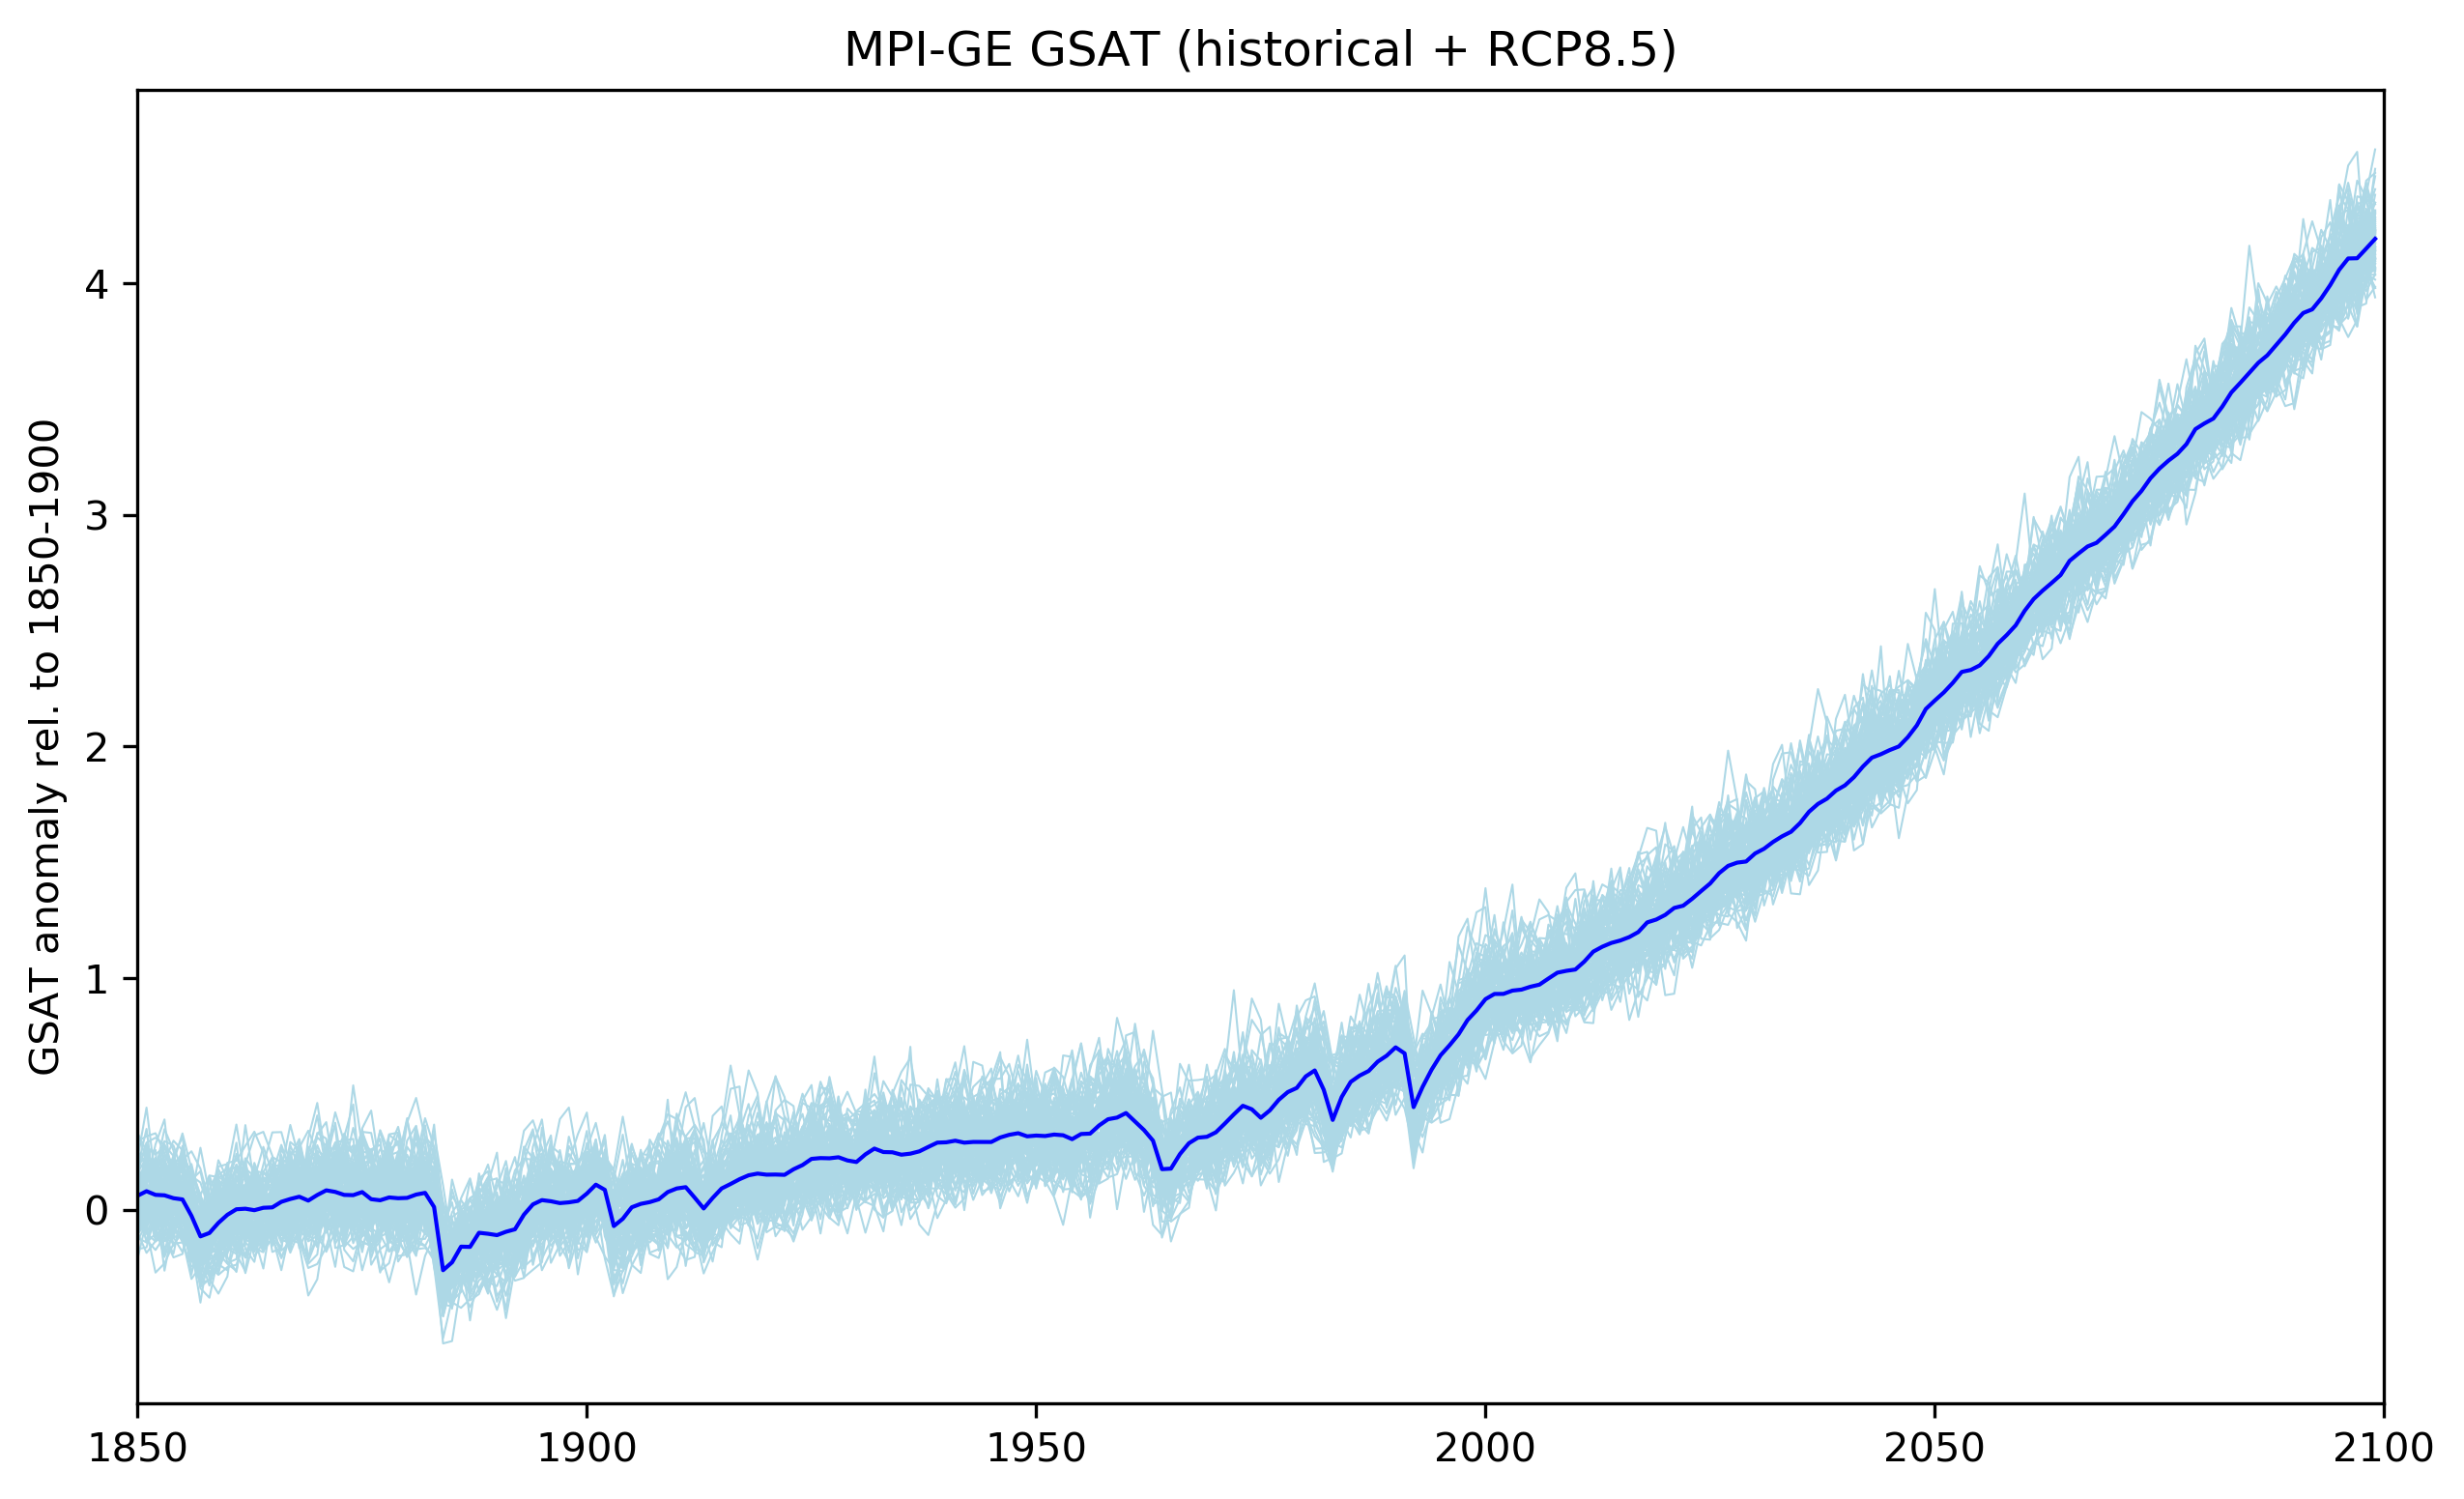

In [13]:
plt.figure(figsize=(10, 6), dpi=300)

plt.plot(mpi_ge_GSAT_ym_anom['year'],mpi_ge_GSAT_ym_anom['tas'],color='lightblue',linewidth=0.5);
plt.plot(mpi_ge_GSAT_ym_anom['year'],mpi_ge_GSAT_ym_anom['tas'].mean(dim='ensemble'),color='blue',linewidth=1);
plt.title('MPI-GE GSAT (historical + RCP8.5)')

plt.ylabel('GSAT anomaly rel. to 1850-1900')
plt.xlim([1850,2100])

plt.savefig(plotdir+'GSAT_MPI-GE.pdf', bbox_inches='tight', dpi=300)

## load CanESM2

In [14]:
var = 'tas'
model = 'canesm2'
filepath = basedir_processed_MMLEA + 'CanESM2/global_mean/'

file_prefix=var+'_'+model+'_'
file_suffix='_globalmean.nc'

# initialise array:
ds = []

for member in tqdm(range(1,51)):
    id = 'r'+str(member)+'i1p1'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file_prefix+id+file_suffix).squeeze()
    ds.append(member)


canesm2_GSAT = xr.concat(ds, dim='ensemble')
canesm2_GSAT['tas'] = canesm2_GSAT['tas']-273.15 # K to °C

100%|██████████| 50/50 [00:01<00:00, 29.86it/s]


### CanESM historical
load CMIP5 historical members 1850-2005 to compute 1850-1900 average

In [15]:
var = 'tas'
model = 'canesm2'
filepath = basedir_processed_MMLEA + 'CanESM2/global_mean/'

file_prefix=var+'_'+model+'_'
file_suffix='_historical_1850-2005_globalmean.nc'

# initialise array:
ds = []

for member in tqdm(range(1,6)):
    id = 'r'+str(member)+'i1p1'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file_prefix+id+file_suffix).squeeze()
    ds.append(member)


canesm2_historical_GSAT = xr.concat(ds, dim='ensemble')
canesm2_historical_GSAT['tas'] = canesm2_historical_GSAT['tas']-273.15 # K to °C

100%|██████████| 5/5 [00:00<00:00, 49.24it/s]


### plot GSAT

In [16]:
canesm2_offset = canesm2_historical_GSAT['tas'].loc[:,'1850-01-01':'1900-12-31'].mean(dim='time').mean(dim='ensemble')

In [17]:
# compute annual mean
canesm2_GSAT_ym = canesm2_GSAT.groupby('time.year').mean('time')
canesm2_GSAT_historical_ym = canesm2_historical_GSAT.groupby('time.year').mean('time')

# compute anomalies relative to 1850-1900
canesm2_GSAT_ym_anom = canesm2_GSAT_ym - canesm2_offset
canesm2_GSAT_historical_ym_anom = canesm2_GSAT_historical_ym - canesm2_offset

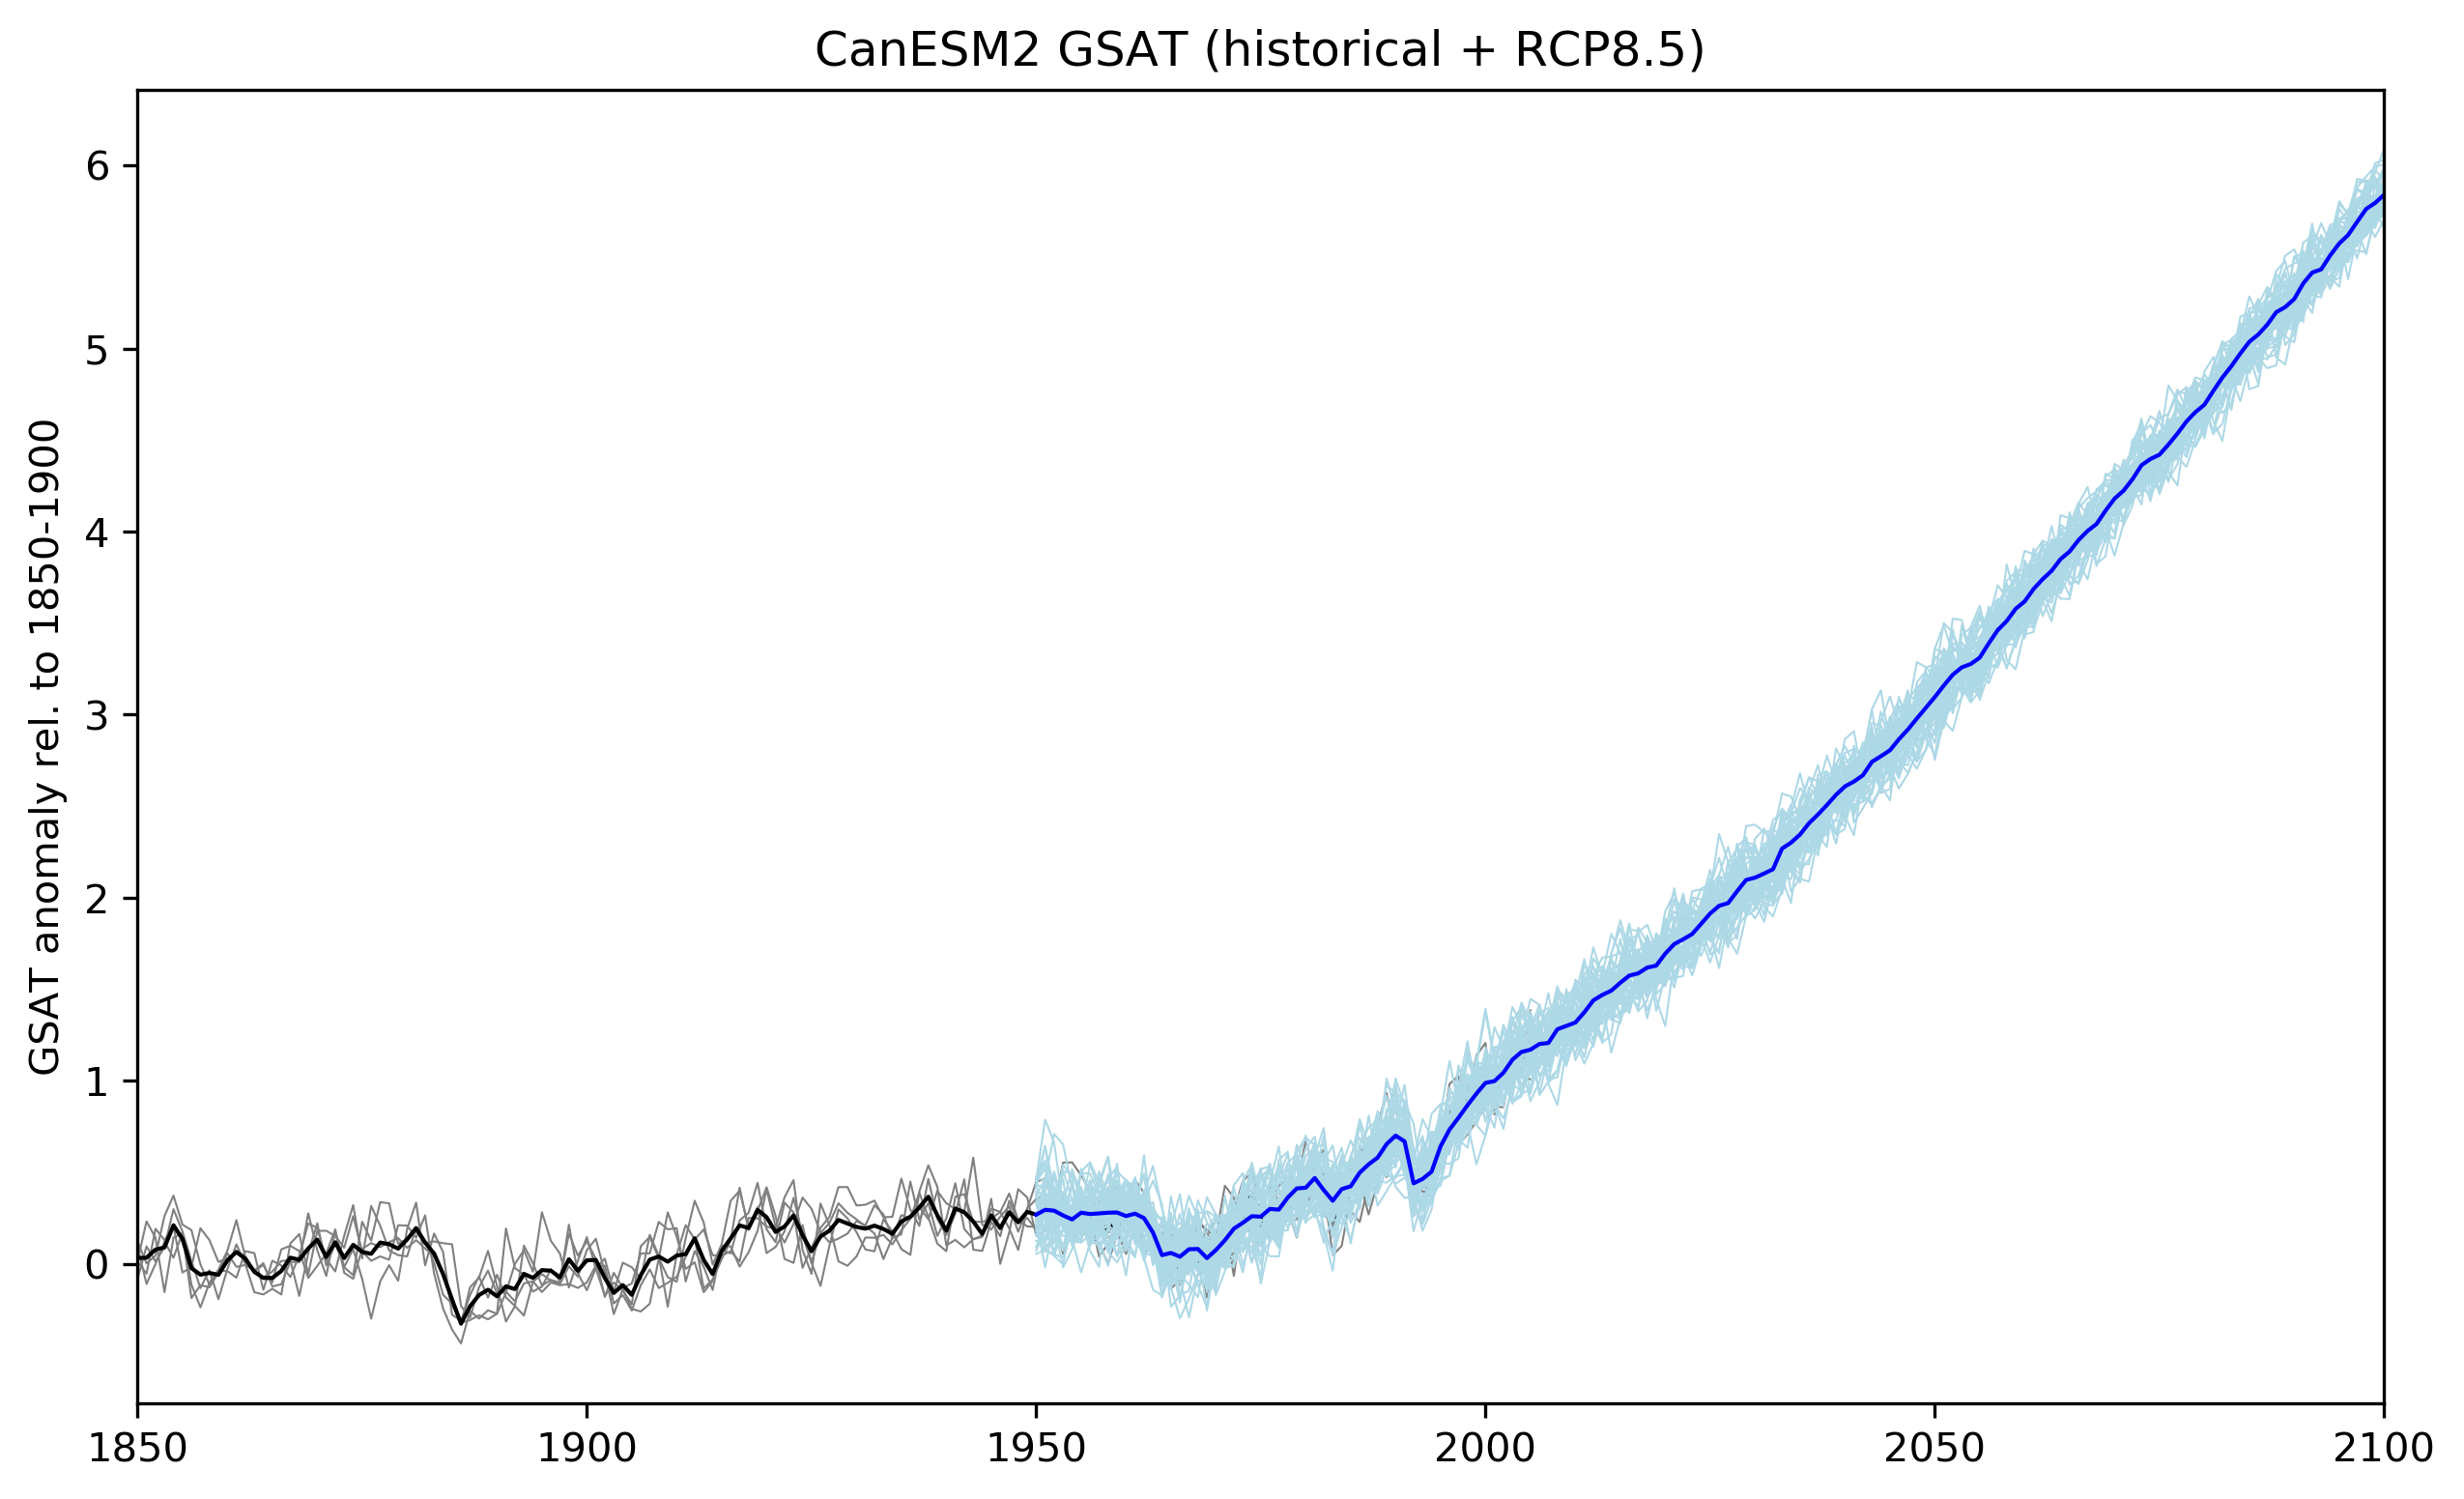

In [18]:
plt.figure(figsize=(10, 6), dpi=300)

# historical members
plt.plot(canesm2_GSAT_historical_ym_anom['year'],canesm2_GSAT_historical_ym_anom['tas'],color='grey',linewidth=0.5);
plt.plot(canesm2_GSAT_historical_ym_anom['year'],canesm2_GSAT_historical_ym_anom['tas'].mean(dim='ensemble'),color='black',linewidth=1);

# LE members
plt.plot(canesm2_GSAT_ym_anom['year'],canesm2_GSAT_ym_anom['tas'],color='lightblue',linewidth=0.5);
plt.plot(canesm2_GSAT_ym_anom['year'],canesm2_GSAT_ym_anom['tas'].mean(dim='ensemble'),color='blue',linewidth=1);
plt.title('CanESM2 GSAT (historical + RCP8.5)')

plt.ylabel('GSAT anomaly rel. to 1850-1900')
plt.xlim([1850,2100])

plt.savefig(plotdir+'GSAT_CanESM2.pdf', bbox_inches='tight', dpi=300)

## load CESM-LENS

In [19]:
var = 'tas'
model = 'cesm-lens'
filepath = basedir_processed_MMLEA + 'CESM-LENS/global_mean/'

file_prefix=var+'_'+model+'_'
file_suffix='_1920-2100_globalmean.nc'

# initialise array:
ds = []

for member in tqdm(range(1,41)):
    if member==1:
        file = 'tas_cesm-lens_historical_rcp85_r1i1p1_1850-2100_globalmean.nc'
    else:
        id = 'r'+str(member)+'i1p1'
        file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


cesm_GSAT = xr.concat(ds, dim='ensemble')
cesm_GSAT['tas'] = cesm_GSAT['tas']-273.15 # K to °C

100%|██████████| 40/40 [00:01<00:00, 31.26it/s]


In [24]:
cesm_GSAT

<xarray.Dataset>
Dimensions:    (bnds: 2, ensemble: 40, time: 3012)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2100-12-16 12:00:00
    lon        float64 0.0
    lat        float64 0.0
    height     float64 2.0
Dimensions without coordinates: bnds, ensemble
Data variables:
    time_bnds  (ensemble, time, bnds) object 1850-01-01 00:00:00 ... 2101-01-01 00:00:00
    tas        (ensemble, time) float32 10.959717 11.250488 ... 16.65329
Attributes:
    CDI:          Climate Data Interface version 1.9.9 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Sat Aug 07 17:29:58 2021: cdo fldmean /glade/scratch/milins...
    NCO:          "4.5.2"
    CDO:          Climate Data Operators version 1.9.9 (https://mpimet.mpg.de...

### plot GSAT

In [20]:
# only using first member
cesm_offset = cesm_GSAT['tas'].loc[0,'1850-01-01':'1900-12-31'].mean(dim='time')

In [21]:
# compute annual mean
cesm_GSAT_ym = cesm_GSAT.groupby('time.year').mean('time')

# compute anomalies relative to 1850-1900
cesm_GSAT_ym_anom = cesm_GSAT_ym - canesm2_offset


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


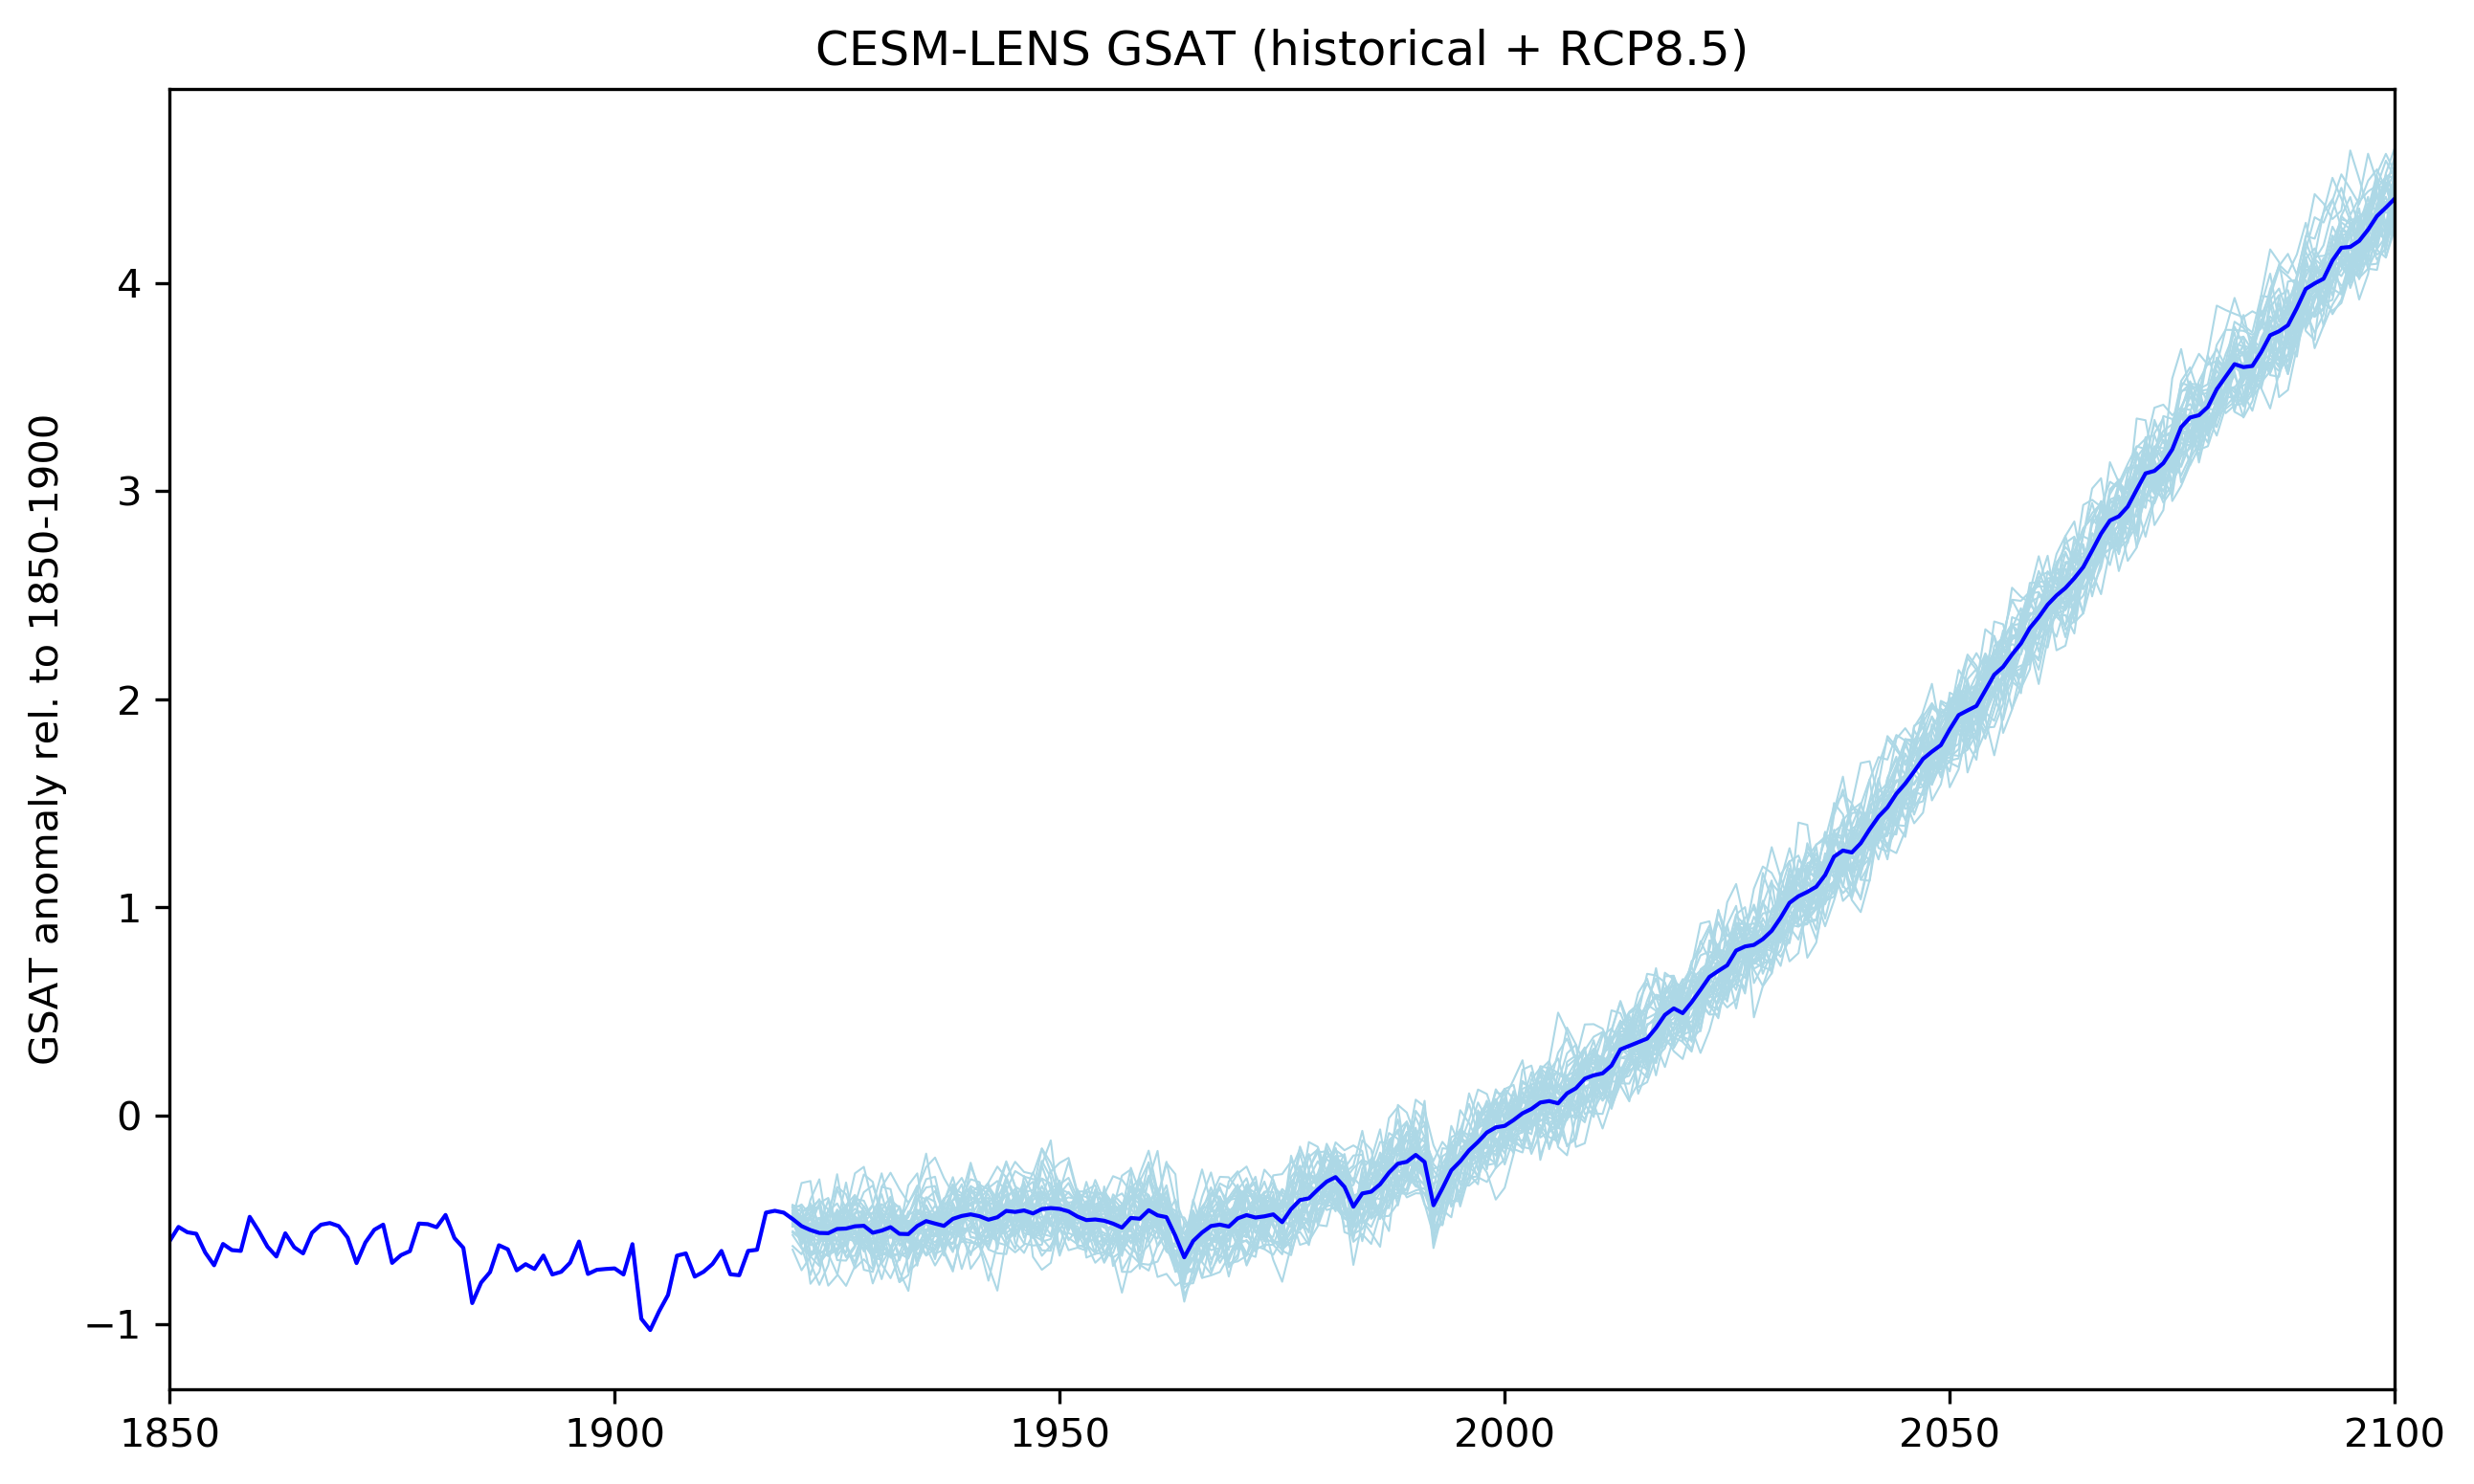

In [22]:
plt.figure(figsize=(10, 6), dpi=300)

# LE members
plt.plot(cesm_GSAT_ym_anom['year'],cesm_GSAT_ym_anom['tas'],color='lightblue',linewidth=0.5);
plt.plot(cesm_GSAT_ym_anom['year'],cesm_GSAT_ym_anom['tas'].mean(dim='ensemble'),color='blue',linewidth=1);
plt.title('CESM-LENS GSAT (historical + RCP8.5)')

plt.ylabel('GSAT anomaly rel. to 1850-1900')
plt.xlim([1850,2100])

plt.savefig(plotdir+'GSAT_cesm.pdf', bbox_inches='tight', dpi=300)